In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv'
train = pd.read_csv(url)

In [126]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,0,6923.076923
1,14000,2010,30000,2,0,6923.076923
2,13000,2010,73500,4,0,6923.076923
3,9500,2009,78000,4,0,6923.076923
4,9000,2007,47000,4,0,6923.076923
5,4000,2006,124000,2,0,6923.076923
6,3000,2004,177000,4,0,6923.076923
7,2000,2004,209000,4,1,2000.000000
8,3000,2003,138000,2,0,6923.076923
9,1900,2003,160000,4,0,6923.076923


In [127]:


import numpy as np

In [130]:
train[train.miles<50000]

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,0,6923.076923
1,14000,2010,30000,2,0,6923.076923
4,9000,2007,47000,4,0,6923.076923


In [9]:
def mileage_split(miles):
    lower_mileage_price = train[train.miles < miles].price.mean()
    higher_mileage_price = train[train.miles >= miles].price.mean()
    train['prediction'] = np.where(train.miles<miles, lower_mileage_price, higher_mileage_price)
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [131]:
metrics.mean_squared_error(train.price, train.prediction)

33640219.780219786

In [10]:
print 'RMSE: ', mileage_split(50000)
train

RMSE:  3984.09174254


,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,15000.000000
1,14000,2010,30000,2,car,15000.000000
2,13000,2010,73500,4,car,4272.727273
3,9500,2009,78000,4,car,4272.727273
4,9000,2007,47000,4,car,15000.000000
5,4000,2006,124000,2,car,4272.727273
6,3000,2004,177000,4,car,4272.727273
7,2000,2004,209000,4,truck,4272.727273
8,3000,2003,138000,2,car,4272.727273
9,1900,2003,160000,4,car,4272.727273


In [13]:
mileage_range = range(train.miles.min(), train.miles.max(), 1000)

In [14]:
RMSE=[mileage_split(miles) for miles in mileage_range]

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14

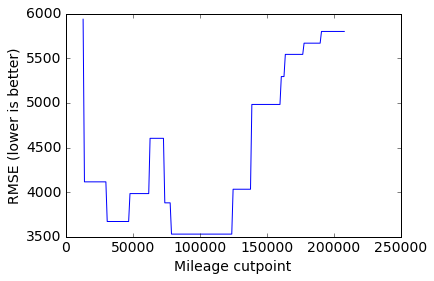

In [16]:
plt.plot(mileage_range, RMSE)
plt.xlabel('Mileage cutpoint')
plt.ylabel('RMSE (lower is better)')

In [136]:
# encode car as 0 and truck as 1
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [134]:
train['vtype']=train.vtype.map({0:'car', 1:'truck'})

In [137]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,0,6923.076923
1,14000,2010,30000,2,0,6923.076923
2,13000,2010,73500,4,0,6923.076923
3,9500,2009,78000,4,0,6923.076923
4,9000,2007,47000,4,0,6923.076923
5,4000,2006,124000,2,0,6923.076923
6,3000,2004,177000,4,0,6923.076923
7,2000,2004,209000,4,1,2000.000000
8,3000,2003,138000,2,0,6923.076923
9,1900,2003,160000,4,0,6923.076923


In [138]:
feature_cols=['year', 'miles', 'doors', 'vtype']
X = train[feature_cols]
y=train.price

In [20]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [21]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

3107.1428571428573

In [25]:
import os

In [27]:
train2 = pd.read_csv('/Users/michaeltwardos/Desktop/decision.csv')

In [28]:
train2

,name,converted,hats,shoes,belts
0,A,1,1,0,1
1,B,1,1,1,1
2,C,1,1,0,1
3,D,1,0,1,1
4,E,1,0,0,0
5,K,1,1,0,1
6,M,1,0,0,1
7,O,1,1,1,0
8,P,1,0,0,1
9,Q,1,0,0,1


In [30]:
train2['prediction'] = train2.converted.mean()
train2

,name,converted,hats,shoes,belts,prediction
0,A,1,1,0,1,0.461538
1,B,1,1,1,1,0.461538
2,C,1,1,0,1,0.461538
3,D,1,0,1,1,0.461538
4,E,1,0,0,0,0.461538
5,K,1,1,0,1,0.461538
6,M,1,0,0,1,0.461538
7,O,1,1,1,0,0.461538
8,P,1,0,0,1,0.461538
9,Q,1,0,0,1,0.461538


In [32]:
np.sqrt(metrics.mean_squared_error(train2.converted, train2.prediction))


0.49851851526214314

In [34]:
feature_cols = ['hats', 'shoes', 'belts']
X = train2[feature_cols]
y = train2.converted

In [35]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [36]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.37459360706313982

In [37]:
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

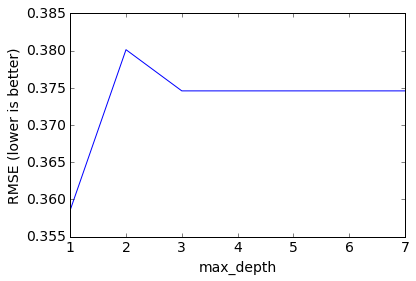

In [38]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

# New Section

In [52]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url)

In [53]:
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

In [54]:
titanic[1:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,NaN,C


In [55]:
titanic.Age.fillna(titanic.Age.median(), inplace=True)

In [56]:
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')

In [57]:
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

In [58]:
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [59]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,S,0,1


In [60]:
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [61]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [62]:
export_graphviz(treeclf, out_file='tree_titanic.dot', feature_names=feature_cols)

In [63]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258


In [67]:
users = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', index_col='user_id')


In [142]:
users[:0]

,age,gender,occupation,zip_code
user_id,,,,


In [73]:
users.columns

Index([u'age', u'gender', u'occupation', u'zip_code'], dtype='object')

In [76]:
users[1:1]

,age,gender,occupation,zip_code
user_id,,,,


In [77]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [78]:
users.shape

(943, 4)

In [79]:
type(users['gender'])

pandas.core.series.Series

In [85]:
users['gender'].describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [144]:
drink_cols

['country', 'beer', 'spirit', 'wine', 'liters', 'continent']

In [90]:
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [91]:
drinks[1:3]

,country,beer,spirit,wine,liters,continent
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF


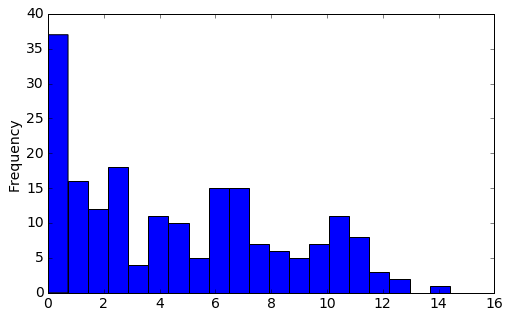

In [146]:
drinks.liters.plot(kind='hist', bins=20)


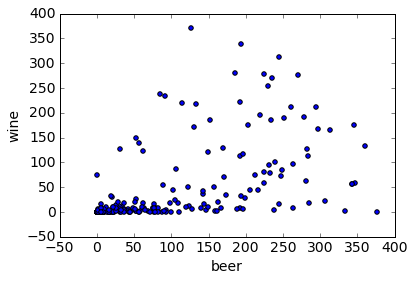

In [94]:
drinks.plot(kind='scatter', x='beer', y='wine')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f05b610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f7fc210>]], dtype=object)

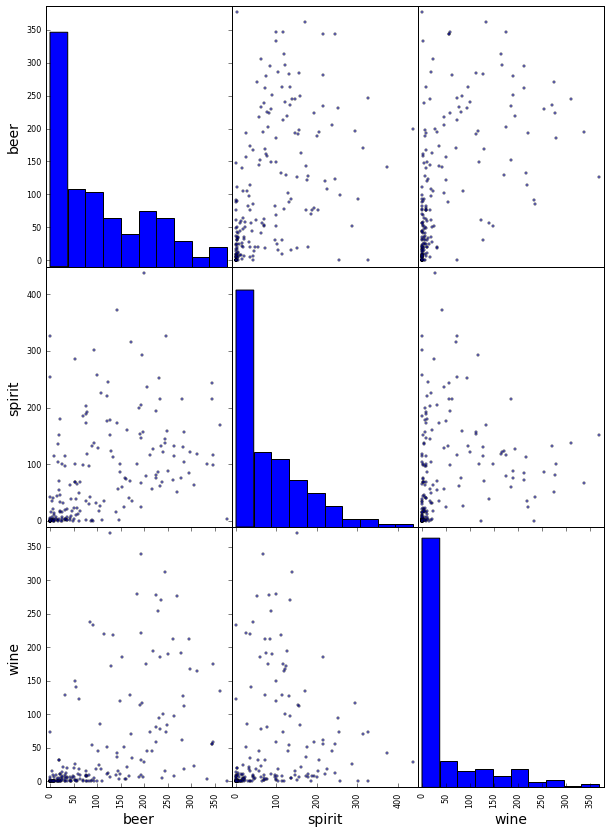

In [147]:
pd.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 14))

In [148]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

In [151]:
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


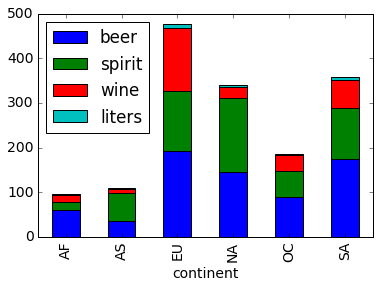

In [101]:
drinks.groupby('continent').mean().plot(kind='bar', stacked=True)


In [102]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

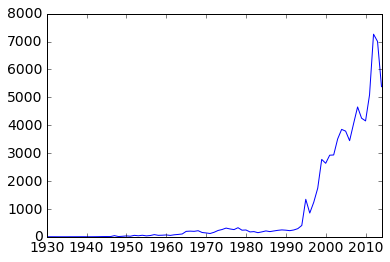

In [104]:
ufo.Year.value_counts().sort_index().plot()

In [105]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [106]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [108]:
iris.shape

(150, 5)

In [111]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [110]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

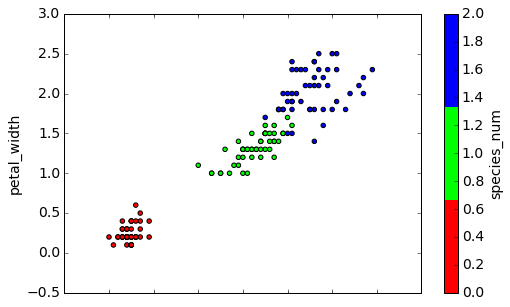

In [112]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)


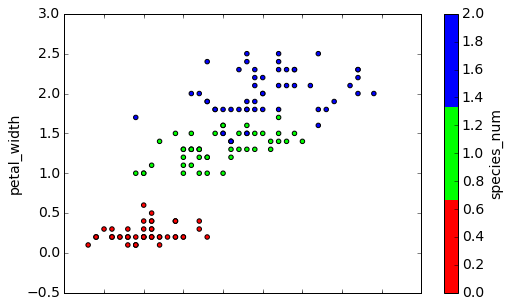

In [150]:
iris.plot(kind='scatter', x='sepal_length', y='petal_width', c='species_num', colormap=cmap_bold)


In [114]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [115]:
y = iris.species_num

In [116]:
from sklearn.neighbors import KNeighborsClassifier


In [117]:
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [118]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT4-students/master/kerry/Final/NBA_players_2015.csv'
nba = pd.read_csv(url, index_col=0)

In [119]:
nba['pos_num'] = nba.pos.map({'C':0, 'F':1, 'G':2})


In [120]:
feature_cols = ['ast', 'stl', 'blk', 'tov', 'pf']
X = nba[feature_cols]

In [121]:
y = nba.pos_num


In [122]:
knn = KNeighborsClassifier(n_neighbors=50)


In [123]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

In [124]:
y_pred_class = knn.predict(X)

In [125]:
from sklearn import metrics
print metrics.accuracy_score(y, y_pred_class)

0.665271966527
